## In this lab, we will explore different image processing techniques including color space conversion and Fourier Transform.

### Import necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os,sys
# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)
from Haider import Repeatable

os.makedirs('../output', exist_ok=True)

In [2]:
r = Repeatable(base_path='../../data/images/')

### Loading an image

In [3]:
image = r.load_image('cats.png')

### Display the original image

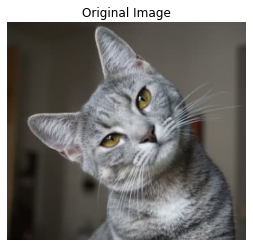

In [4]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

## 1. Converting between different color spaces

### Converting the image from BGR to Gray

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Display the grayscale image

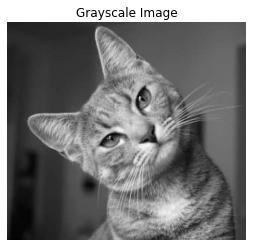

In [6]:
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

### Converting the image from BGR to HSV

In [7]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

###  Display the HSV image

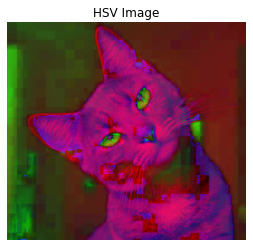

In [8]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
plt.title("HSV Image")
plt.axis('off')
plt.show()

##  2. Understanding the BGR color model

**Note:** In OpenCV, `BGR` stands for `Blue-Green-Red`. The `BGR` color space may seem confusing at first, as it mixes colors differently than `RGB`.

###  Example of color representation in BGR

In [9]:
blue_color = np.zeros((100, 100, 3), dtype=np.uint8)
blue_color[:, :, 0] = 255  # Blue channel set to full intensity

green_color = np.zeros((100, 100, 3), dtype=np.uint8)
green_color[:, :, 1] = 255  # Green channel set to full intensity

red_color = np.zeros((100, 100, 3), dtype=np.uint8)
red_color[:, :, 2] = 255  # Red channel set to full intensity

### Display the blue, green, and red color representations

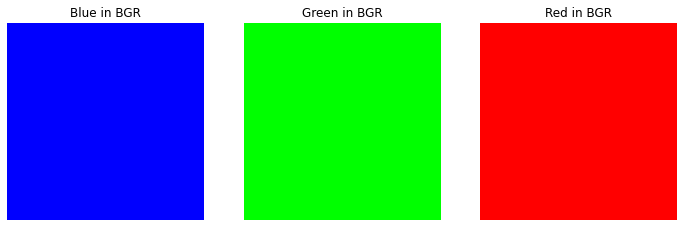

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blue_color, cv2.COLOR_BGR2RGB))
plt.title("Blue in BGR")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(green_color, cv2.COLOR_BGR2RGB))
plt.title("Green in BGR")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(red_color, cv2.COLOR_BGR2RGB))
plt.title("Red in BGR")
plt.axis('off')

plt.show()

### bgr_image after mixing these colors

In [11]:
rgb_image = np.zeros((100, 100, 3), dtype=np.uint8)
rgb_image[:, :, 0] = 0  # Blue channel set to full intensity
rgb_image[:, :, 1] = 0  # Green channel set to full intensity
rgb_image[:, :, 2] = 0  # Red channel set to full intensity

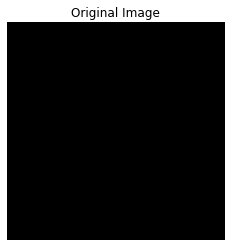

In [12]:
plt.imshow(rgb_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

## 3. Fourier Transform in Image Processing with OpenCV

The **Fourier Transform** is a mathematical technique that transforms an image from the spatial domain to the frequency domain. This allows us to analyze the frequency components of an image, which are crucial for various image processing tasks.

### What Does the Fourier Transform Do?

The Fourier Transform decomposes an image into a sum of sine and cosine waves. These waves represent different frequency components of the image, from low frequencies (which represent large, smooth areas) to high frequencies (which represent sharp edges and fine details). 

### Applications in OpenCV

In OpenCV, the Fourier Transform is particularly useful for:

1. **Edge Detection:**
2. **Noise Removal:**
3. **Identifying Regions of Interest (ROI):**

### Practical Steps in OpenCV

1. **Apply the Fourier Transform:**
2. **Shift the Zero Frequency Component:**
3. **Magnitude Spectrum:**
4. **Filtering and Inverse Fourier Transform:**

### Conclusion

The Fourier Transform is a powerful tool in image processing. In OpenCV, it helps with tasks like edge detection, noise reduction, and isolating regions of interest by analyzing the frequency components of an image. Mastering this technique opens up many possibilities for enhancing image quality and extracting useful information from images.


In [13]:
image = r.load_image('image.png')

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale

### Apply Fourier Transform

In [15]:
dft = np.fft.fft2(gray_image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency component to the center`

**Note:** The `np.fft.fft2(gray_image)` function computes the 2D Fourier Transform of the grayscale image, transforming it into the frequency domain. The `np.fft.fftshift(dft)` shifts the zero-frequency component from the corners to the center of the transformed image for better visualization and processing.

### Calculate magnitude spectrum

In [16]:
magnitude_spectrum = np.abs(dft_shifted)

**Note:** The `np.abs(dft_shifted)` function calculates the magnitude of each frequency component in the shifted Fourier-transformed image. This magnitude spectrum represents the intensity of different frequencies, which can be visualized to analyze the image's frequency content.

### Display the magnitude spectrum

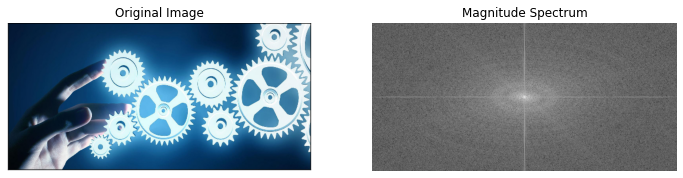

In [17]:
# Display the original image and the magnitude spectrum side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')  # Apply log scale for better visibility
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.show()

## 4. High Pass Filter (HPF) for Edge Detection

In this lab, we'll explore the concept of high pass filters (HPF) and how they can be used for edge detection in images. A high pass filter is used to emphasize the intensity difference of pixels compared to their neighbors, boosting regions with significant changes.

### Steps of the Lab:

1. **Understanding how a high pass filter works**  
   A high pass filter allows high-frequency components (edges and fine details) to pass through while suppressing low-frequency components (smooth areas).

2. **Applying different kernels (3x3, 5x5) to images**  
   We will apply high pass filter kernels of varying sizes (3x3, 5x5) to the image to observe how the filter affects the edges and fine details.

3. **Comparing the results using convolution**  
   By performing convolution with the high pass filter, we will compare the results to understand the impact of filter size and design on edge detection performance.


### 1. Import Required Libraries

In [18]:
from scipy import ndimage # We import this library for convolution operations

### 2. Load Image

In [19]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

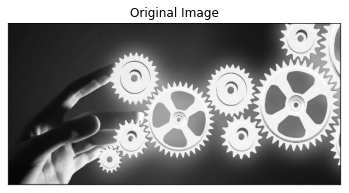

In [20]:
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

### 3. Define the High Pass Filter Kernels

In this section, we'll define two kernels for the high pass filter:

1. **A 3x3 kernel**  
   A 3x3 high pass filter kernel emphasizes edges by subtracting the average surrounding pixel values from the central pixel:

   ```
   [[ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]]
    ```
This kernel highlights small intensity differences and sharp transitions in the image.

2. **A 5x5 kernel**
    A 5x5 high pass filter kernel uses a larger neighborhood to compute the difference:
    ```
    [[  0,   0,  -1,   0,   0],
     [  0,  -1,  -2,  -1,   0],
     [ -1,  -2,  16,  -2,  -1],
     [  0,  -1,  -2,  -1,   0],
     [  0,   0,  -1,   0,   0]]
    ```
This kernel focuses more on significant intensity changes by considering a larger region around each pixel.

In [21]:
# Define a 3x3 high pass filter kernel
kernel_3x3 = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

# Define a 5x5 high pass filter kernel
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1,  2,  2,  2, -1],
                       [-1,  2,  8,  2, -1],
                       [-1,  2,  2,  2, -1],
                       [-1, -1, -1, -1, -1]])

In [22]:
# Display the kernels
print("3x3 High Pass Filter Kernel:\n", kernel_3x3)
print("\n5x5 High Pass Filter Kernel:\n", kernel_5x5)

3x3 High Pass Filter Kernel:
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

5x5 High Pass Filter Kernel:
 [[-1 -1 -1 -1 -1]
 [-1  2  2  2 -1]
 [-1  2  8  2 -1]
 [-1  2  2  2 -1]
 [-1 -1 -1 -1 -1]]


### 4. Apply the High Pass Filter using Convolution

We will use the `ndimage.convolve()` function from SciPy to apply the kernels to the image. This function performs convolution and is perfect for working with multi-dimensional arrays like images.

In [23]:
# Apply the 3x3 high pass filter using convolution
hpf_3x3 = ndimage.convolve(image, kernel_3x3)

# Apply the 5x5 high pass filter using convolution
hpf_5x5 = ndimage.convolve(image, kernel_5x5)

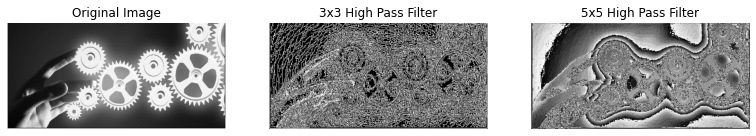

In [24]:
plt.figure(figsize=(18, 6)) 

# Display the Original Image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the 3x3 High Pass Filter result
plt.subplot(1, 4, 2)
plt.imshow(hpf_3x3, cmap='gray')
plt.title("3x3 High Pass Filter")
plt.axis('off')

# Display the 5x5 High Pass Filter result
plt.subplot(1, 4, 3)
plt.imshow(hpf_5x5, cmap='gray')
plt.title("5x5 High Pass Filter")
plt.axis('off')

plt.show()


### 5. Apply a Low Pass Filter and Calculate the Difference

Another way to obtain a high pass filter is by first applying a **low pass filter** (such as Gaussian blur), and then **subtracting** it from the original image. This method emphasizes high-frequency components of the image.

In [25]:
# Apply a Gaussian blur (low pass filter)
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

The `cv2.GaussianBlur(image, (11, 11), 0)` function applies a Gaussian Blur to the input image. Here's how it works:

1. **Image Blurring:**  
   - It smooths the image by averaging pixel values within a specified kernel size, reducing noise and detail.
   
2. **Kernel Size `(11, 11):`**  
   - The filter uses an 11x11 kernel (window size), meaning it considers the pixel and its 10 surrounding neighbors in both dimensions for averaging.

3. **Sigma Value (`0`):**  
   - A value of `0` tells OpenCV to automatically calculate the standard deviation (sigma) of the Gaussian distribution based on the kernel size.

This results in a softened image that helps in preprocessing tasks like noise reduction or enhancing the performance of edge detection algorithms.


In [26]:
# Calculate the High Pass Filter by subtracting the blurred image from the original image
hpf_from_lpf = image - blurred_image

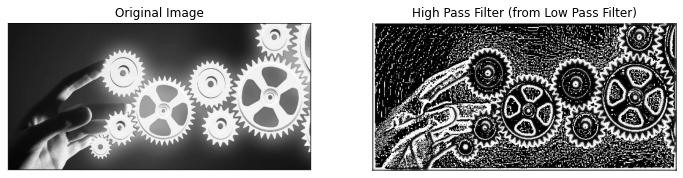

In [27]:
plt.figure(figsize=(12, 6)) 

# Display the Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the result
plt.subplot(1, 2, 2)
plt.imshow(hpf_from_lpf, cmap='gray')
plt.title("High Pass Filter (from Low Pass Filter)")
plt.axis('off')
plt.show()


### 6. Comparison of Methods
Now, let’s compare the results from the 3x3, 5x5 kernels and the high pass filter derived from the low pass filter.


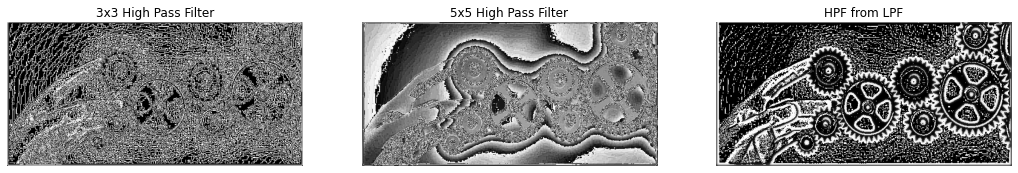

In [28]:
# Plotting all three methods side by side for comparison
plt.figure(figsize=(18, 6))

# 3x3 High Pass Filter
plt.subplot(1, 3, 1)
plt.imshow(hpf_3x3, cmap='gray')
plt.title("3x3 High Pass Filter")
plt.axis('off')

# 5x5 High Pass Filter
plt.subplot(1, 3, 2)
plt.imshow(hpf_5x5, cmap='gray')
plt.title("5x5 High Pass Filter")
plt.axis('off')

# High Pass Filter from Low Pass Filter
plt.subplot(1, 3, 3)
plt.imshow(hpf_from_lpf, cmap='gray')
plt.title("HPF from LPF")
plt.axis('off')

plt.show()

## 5. Low Pass Filter

A **Low Pass Filter (LPF)** is used to smooth images by suppressing high-frequency components (like edges and noise) while retaining low-frequency components (like smooth intensity variations).

### Key Points:
1. **Purpose:**  
   LPFs are commonly used to reduce noise and blur an image, making it useful for preprocessing tasks.

2. **How It Works:**  
   An LPF averages the pixel values in a local neighborhood, reducing intensity variations and preserving gradual changes.

### Blur Function
The `cv2.blur()` function in OpenCV applies a simple averaging filter to smooth an image. Here's how to use it:

In [29]:
image = r.load_image('cats.png')

In [30]:
# Apply the Blur function with a 5x5 kernel
blurred_image = cv2.blur(image, (5, 5))

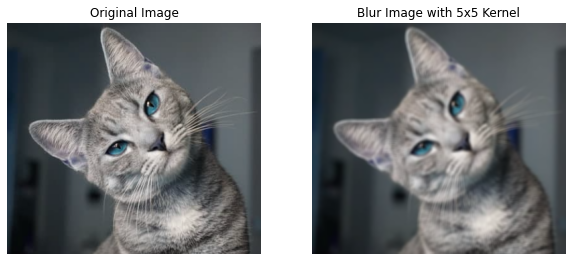

In [31]:
# Plotting all three methods side by side for comparison
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blur Image with 5x5 Kernel")
plt.axis('off')

plt.show()

### Applying Gaussian Blur and Median Blur

#### 1. **Gaussian Blur**
The `cv2.GaussianBlur()` function applies a Gaussian Blur, which smooths the image by using a weighted average where pixels closer to the center have a higher influence.

In [32]:
# Apply Gaussian Blur with an 11x11 kernel
gaussian_blurred = cv2.GaussianBlur(image, (11, 11), 0)

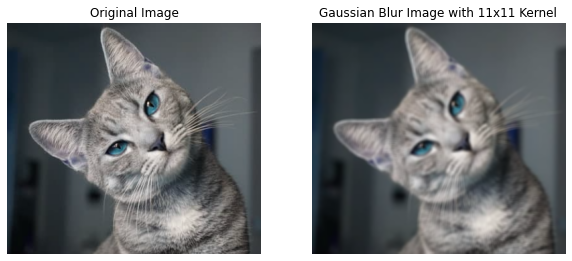

In [33]:
# Plotting all three methods side by side for comparison
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blur Image with 11x11 Kernel")
plt.axis('off')

plt.show()

#### 2. Median Blur
The `cv2.medianBlur()` function applies a Median Blur, which replaces each pixel's value with the median value of its neighboring pixels. It is especially useful for removing salt-and-pepper noise.

In [34]:
image = r.load_image('OIP (1).jpg')

In [35]:
# Apply Median Blur with a kernel size of 5
median_blurred = cv2.medianBlur(image, 9)

**Kernel Size 5:** Determines the size of the neighborhood used to calculate the median. Must be an odd number.

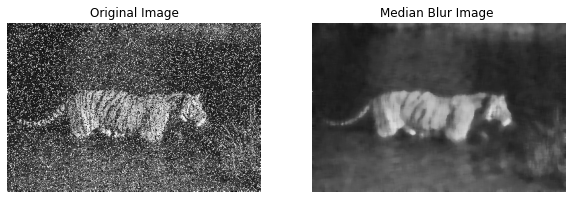

In [36]:
# Plotting all three methods side by side for comparison
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_blurred, cmap='gray')
plt.title("Median Blur Image ")
plt.axis('off')

plt.show()

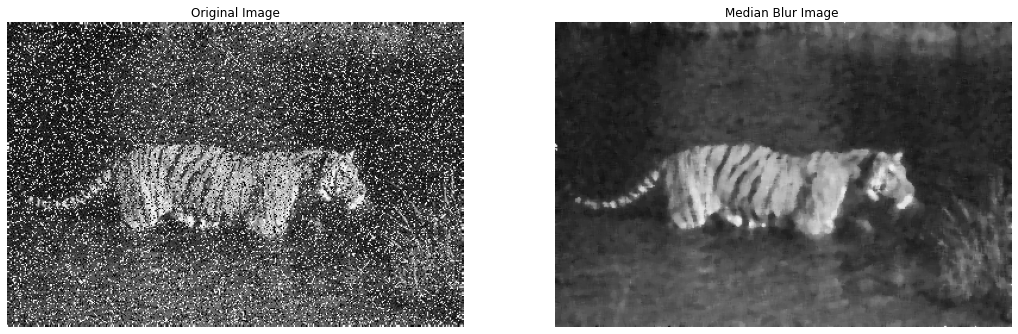

In [37]:
image = r.load_image('OIP (1).jpg')
# Apply Median Blur with a kernel size of 5
median_blurred = cv2.medianBlur(image, 5)
# Plotting all three methods side by side for comparison
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_blurred, cmap='gray')
plt.title("Median Blur Image ")
plt.axis('off')

plt.show()


#### Comparison: Gaussian Blur vs Median Blur

| Feature               | Gaussian Blur                      | Median Blur                       |
|-----------------------|-------------------------------------|-----------------------------------|
| **Type of Blur**      | Weighted average (Gaussian kernel)  | Median of neighboring pixels      |
| **Noise Reduction**   | Effective for general noise         | Best for salt-and-pepper noise    |
| **Smoothness**        | Produces smoother results           | Preserves edges better than Gaussian Blur |


### OpenCV Edge Detecting Filter

Edge detection highlights the boundaries in an image by identifying regions with significant intensity changes. OpenCV provides several methods for edge detection, including **Sobel**, **Laplacian**, and **Canny** filters.

#### 1. **Sobel Edge Detection**
The Sobel filter detects edges in both horizontal and vertical directions by computing the gradient of the image intensity.


In [38]:
# Read the image in grayscale
image = r.load_image('cats.png', 0)

In [39]:
# Apply Sobel filter in X and Y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

### Sobel Operator Parameters: `dx` and `dy`

#### `dx` (first direction):
- This parameter specifies the order of the derivative in the **x-direction** (horizontal axis).
  - `1` means the first derivative (gradient) in the x-direction (detects horizontal edges).
  - `0` means no derivative in the x-direction (used when applying Sobel in the y-direction).

#### `dy` (second direction):
- This parameter specifies the order of the derivative in the **y-direction** (vertical axis).
  - `0` means no derivative in the y-direction (used when applying Sobel in the x-direction).
  - `1` means the first derivative (gradient) in the y-direction (detects vertical edges).


**ksize=3:** Kernel size for the filter. Larger sizes detect broader edges.</br>
**cv2.CV_64F:** Ensures higher precision to capture edge gradients.

In [40]:
# Convert to absolute scale and merge results
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(sobel_combined)

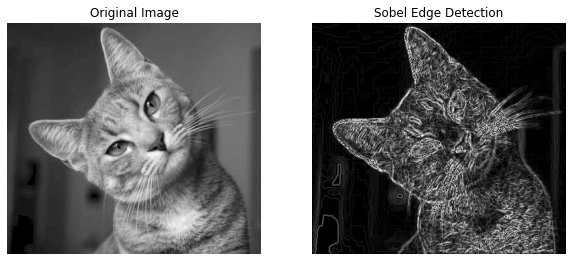

In [41]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')  
plt.show()

### 2. Laplacian Edge Detection
The Laplacian filter detects edges by calculating the second derivative of the image intensity.

In [42]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=5)
# Invert the result of the Laplacian (convert to uint8 for visualization)
# laplacian_inverted = cv2.bitwise_not(np.uint8(laplacian))

**Advantage:** Captures edges regardless of direction (horizontal, vertical, or diagonal).

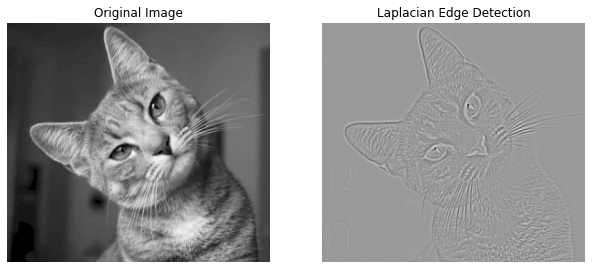

In [43]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off') 

# plt.subplot(1, 3, 3)
# plt.imshow(laplacian_inverted, cmap='gray')
# plt.title('Inverted Laplacian Filter')
# plt.axis('off') 
plt.show()

### 3. Canny Edge Detection
Canny is a multi-stage algorithm that provides precise edge detection using gradient thresholds.

In [44]:
# Apply Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)

**Thresholds `(100, 200)`:**
- The lower threshold `(100)` discards weak edges.
- The upper threshold `(200)` keeps strong edges.

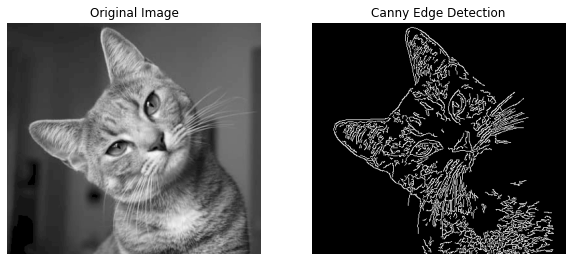

In [45]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')  
plt.show()

### Comparison of Methods

| Feature             | Sobel                  | Laplacian              | Canny                  |
|---------------------|------------------------|------------------------|------------------------|
| **Type**            | Gradient-based         | Second derivative      | Multi-stage edge detection |
| **Edge Direction**  | Horizontal & Vertical  | All directions         | Strong edges based on thresholds |
| **Complexity**      | Low                    | Low                    | Moderate               |
| **Precision**       | Moderate               | Moderate               | High                   |


### Custom Kernels

In [46]:
# Base class for convolution filters
class VConvolutionFilter:
    def __init__(self, kernel):
        self.kernel = kernel

    def apply(self, src, dst):
        """Apply the filter to the source image and store the result in the destination."""
        cv2.filter2D(src, -1, self.kernel, dst)

#### VConvolutionFilter Class

- `VConvolutionFilter` is a class that represents a convolution filter.
- The constructor `__init__` takes a **kernel** (a 2D filter matrix) as input and stores it.
- The `apply` method applies the convolution filter to the source image (`src`) and stores the result in the destination image (`dst`).
- It uses OpenCV's `cv2.filter2D()` function to perform the convolution operation.
- The depth of the output image is kept the same as the input image by passing `-1` as the second argument to `filter2D`.


In [47]:
# Low-pass (Blur) filter
class BlurFilter(VConvolutionFilter):
    # Constructor to initialize the BlurFilter with a specific kernel
    def __init__(self):
        # Define a 5x5 kernel of ones and normalize it to create an average blur filter
        # The kernel is divided by 25 to ensure that the sum of all elements is 1,
        # effectively averaging the pixel values in the 5x5 neighborhood.
        # This is a simple box blur filter where each pixel in the output is the average of the pixels in the kernel's area.
        kernel = np.ones((5, 5), dtype=np.float32) / 25  # A simple average kernel
        
        # Call the parent class constructor to initialize the kernel in the VConvolutionFilter class
        # The super() function calls the __init__ method of VConvolutionFilter with the generated kernel.
        super().__init__(kernel)



# Sharpen filter
class SharpenFilter(VConvolutionFilter):
    def __init__(self):
        kernel = np.array([
            [0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]
        ], dtype=np.float32)
        super().__init__(kernel)


# Edge detection filter
class FindEdgesFilter(VConvolutionFilter):
    def __init__(self):
        kernel = np.array([
            [-1, -1, -1],
            [-1, 8, -1],
            [-1, -1, -1]
        ], dtype=np.float32)
        super().__init__(kernel)


# Emboss Filter
class EmbossFilter(VConvolutionFilter):
    # Constructor to initialize the EmbossFilter with a specific kernel
    def __init__(self):
        # Define a 3x3 kernel for embossing
        # The kernel highlights the difference in pixel intensity, giving the image a "raised" appearance.
        # It works by emphasizing edges and creating a 3D effect based on light and shadow.
        kernel = np.array([
            [-2, -1, 0],  # Negative values to capture the shadow on one side of edges
            [-1,  1, 1],  # Central positive value with surrounding positive values to enhance highlights
            [ 0,  1, 2]   # Positive values to capture highlights on the other side of edges
        ], dtype=np.float32)  # Use float32 to handle the convolution operation

        # Call the parent class constructor to initialize the kernel in the VConvolutionFilter class
        # The super() function calls the __init__ method of the VConvolutionFilter class with the defined kernel.
        super().__init__(kernel)

In [48]:
# Function to apply median blur and edge detection to create a "sketched" effect
def stroke_edges(src, dst, blur_ksize=7, edge_ksize=5):
    # Check if the blur kernel size is valid (must be >= 3)
    if blur_ksize >= 3:
        # Apply a median blur to the source image with the given kernel size to reduce noise
        blurred_src = cv2.medianBlur(src, blur_ksize)
        
        # Convert the blurred image to grayscale for edge detection
        gray_src = cv2.cvtColor(blurred_src, cv2.COLOR_BGR2GRAY)
    else:
        # If the kernel size is smaller than 3, convert the original source image to grayscale directly
        gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    
    # Apply Laplacian edge detection to the grayscale image to highlight edges
    # The result is stored in the same grayscale image (gray_src) to modify it in place
    cv2.Laplacian(gray_src, cv2.CV_8U, gray_src, ksize=edge_ksize)
    
    # Normalize the Laplacian result to create an inverse alpha mask (for blending)
    # Inverse alpha makes the edges lighter and the non-edge areas darker
    normalized_inverse_alpha = (1.0 / 255) * (255 - gray_src)
    
    # Split the source image into its individual color channels (BGR)
    channels = cv2.split(src)
    
    # Loop through each channel and apply the normalized inverse alpha to modify pixel intensities
    # This step blends the edges into the original image by adjusting each channel based on the edges
    for channel in channels:
        channel[:] = channel * normalized_inverse_alpha
    
    # Merge the modified channels back together into the destination image (dst)
    cv2.merge(channels, dst)

#### Apply filters

In [49]:
src = r.load_image('cats.png')

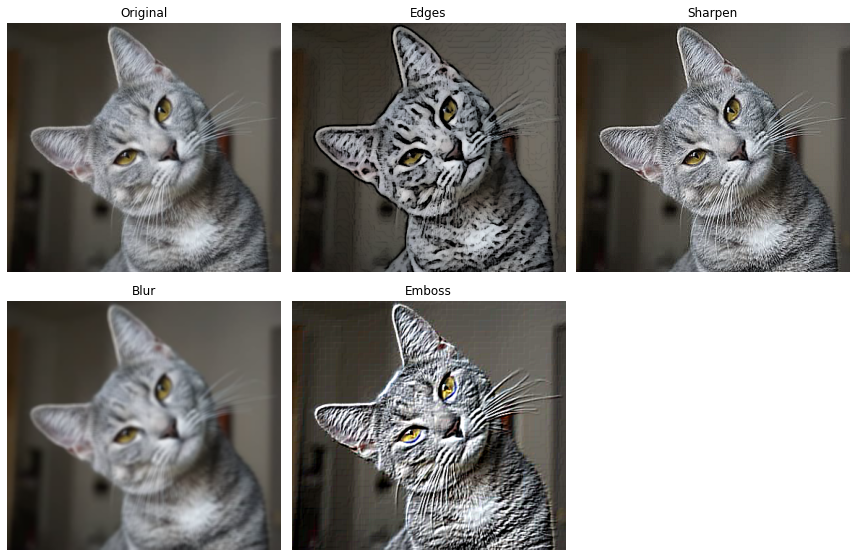

In [50]:
dst_edges = src.copy()
stroke_edges(src, dst_edges)

sharpen_filter = SharpenFilter()
dst_sharpen = src.copy()
sharpen_filter.apply(src, dst_sharpen)

blur_filter = BlurFilter()
dst_blur = src.copy()
blur_filter.apply(src, dst_blur)

emboss_filter = EmbossFilter()
dst_emboss = src.copy()
emboss_filter.apply(src, dst_emboss)

# Display results
def display_image(title, image):
    """Helper function to convert BGR to RGB and display using Matplotlib."""
    if len(image.shape) == 3:  # Color image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')

# Set up the Matplotlib figure
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
display_image("Original", src)

# Edge-detected image
plt.subplot(2, 3, 2)
display_image("Edges", dst_edges)

# Sharpened image
plt.subplot(2, 3, 3)
display_image("Sharpen", dst_sharpen)

# Blurred image
plt.subplot(2, 3, 4)
display_image("Blur", dst_blur)

# Embossed image
plt.subplot(2, 3, 5)
display_image("Emboss", dst_emboss)

# Show all results
plt.tight_layout()
plt.show()

## 6. Edge Detection with Canny in OpenCV

OpenCV provides a powerful function for edge detection called **Canny**, named after its inventor, **John F. Canny**. It is widely used due to its effectiveness and the simplicity of its implementation in OpenCV.

#### Explanation of the Canny Algorithm:

The **Canny Edge Detection** algorithm is a five-step process:

1. **Noise Reduction**:
   - A **Gaussian filter** is applied to smooth the image, reducing noise and avoiding false edge detection.

2. **Gradient Calculation**:
   - **Sobel filters** are used to calculate intensity gradients in both the horizontal (Gx) and vertical (Gy) directions. This step helps to identify the edges of the image.

3. **Non-Maximum Suppression (NMS)**:
   - This step suppresses all non-maximum pixel values, keeping only local maxima in gradient magnitude. This ensures that the edges detected are thin and well-defined.

4. **Double Threshold**:
   - **Strong edges** above the upper threshold are marked as edges.
   - **Weak edges** between the lower and upper thresholds are retained for further analysis. These edges are important because they might be part of a stronger edge but are not detected as strong enough on their own.

5. **Edge Tracking by Hysteresis**:
   - **Weak edges** are kept if they are connected to **strong edges**. This step ensures that weak edges that are part of a continuous boundary are not discarded.
   - **Isolated weak edges** that are not connected to strong edges are discarded.



In [51]:
img =r.load_image("colonies-01.jpg", 0)

In [52]:
# Apply Canny Edge Detection
edges = cv2.Canny(img, 200, 300)

#### Parameters:

- **200, 300**:
   - These are the **lower** and **upper thresholds** for edge detection. Adjusting these values changes the sensitivity of edge detection:
     - **Lower values**: Detect more edges, but may include noise.
     - **Higher values**: Detect fewer edges, but the result is cleaner and more defined.


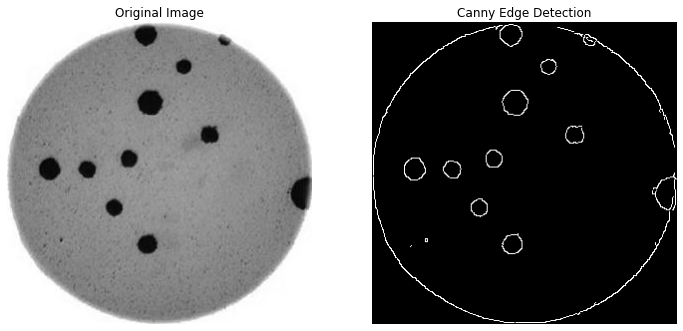

In [53]:
# Display the original image and the Canny side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Canny Edge Detection
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')  
plt.title("Canny Edge Detection")
plt.axis('off')

plt.show()

## 7. Contour Detection in OpenCV

Contour detection is a fundamental task in computer vision, enabling the identification of object boundaries within an image. It is often used to calculate bounding polygons, approximate shapes, and identify regions of interest. These operations are particularly useful in object detection and tracking

In [54]:
# Create a blank black image
img = np.zeros((200, 200), dtype=np.uint8)

In [55]:
# Draw a white square in the center
img[50:150, 50:150] = 255

In [56]:
# Threshold the image to create a binary image
ret, thresh = cv2.threshold(img, 127, 255, 0)

- The `cv2.threshold()` function is used to convert an image to a binary format.
- It compares each pixel of the image (`img`) with the threshold value (`127`), setting pixels above it to `255` (white) and those below to `0` (black).
- The function returns two values: `ret`, the threshold used (127), and `thresh`, the resulting binary image.

In [57]:
# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

- The `cv2.findContours()` function is used to detect the contours in a binary image.
- It takes the binary image (`thresh`) as input and returns a list of contours and the hierarchy of contours.
- `cv2.RETR_TREE` is used to retrieve all contours and reconstruct a full hierarchy, while `cv2.CHAIN_APPROX_SIMPLE` compresses the contour points to save memory by approximating the contour.


- **Contours**: In a binary image, contours are the boundaries or outlines of connected regions of pixels that have the same intensity (usually 0 or 255). They help define the shape and structure of objects within the image, representing the edges of regions.

- **Hierarchy**: The hierarchy is a data structure that describes the relationship between contours, such as parent-child or sibling relationships. It helps identify nested contours (e.g., holes inside shapes) and contours at the same level, providing context for more complex shapes.


In [58]:
# Convert the original image to color for visualization
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

In [59]:
# Draw contours on the color image
cv2.drawContours(color_img, contours, -1, (0, 255, 0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

- The `cv2.drawContours()` function is used to draw contours on a color image (`color_img`). It takes the contours, draws all of them (specified by `-1`), uses green color `(0, 255, 0)`, and sets the contour thickness to 2 pixels.

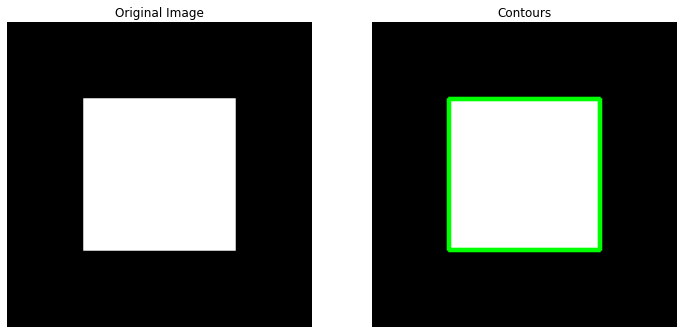

In [60]:
# Display the original image and the Contours side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

#Contours
plt.subplot(1, 2, 2)
plt.imshow(color_img) 
plt.title("Contours")
plt.axis('off')


plt.show()

## 8. Detecting Bounding Box, Minimum Area Rectangle, and Minimum Enclosing Circle

In this example, we'll use OpenCV to:

- **Detect the contours** of shapes in an image.
- **Draw:**
  - **Bounding Box**: The smallest rectangle that can completely enclose a contour.
  - **Minimum Area Rectangle**: The rotated rectangle with the smallest area enclosing the contour.
  - **Minimum Enclosing Circle**: The smallest circle that can completely enclose the contour.


In [61]:
img = cv2.pyrDown(r.load_image('Picture1.jpg')) 
image = img.copy()

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)  # Threshold to binary

In [63]:
# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

**cv2.minEnclosingCircle(c):** Finds the smallest circle that can enclose the contour.</br>
**cv2.circle():** Draws the circle.

In [64]:
# Iterate through each contour
for c in contours:
    # Draw bounding box
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    '''
    cv2.boundingRect(c): Computes the smallest upright rectangle enclosing the contour.
    cv2.rectangle(): Draws the rectangle on the original image.
    '''
    # Draw minimum area rectangle
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)  # Get rectangle corner points
    box = np.intp(box)  # Normalize to integers
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
    '''
    cv2.minAreaRect(c): Finds the smallest rotated rectangle enclosing the contour.
    cv2.boxPoints(rect): Converts the rectangle into its four corner points.
    cv2.drawContours(): Draws the rectangle using the corner points.
    '''

    # Draw minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img, center, radius, (255, 0, 0), 2)
    '''
    cv2.minEnclosingCircle(c): Finds the smallest circle that can enclose the contour.
    cv2.circle(): Draws the circle.
    '''

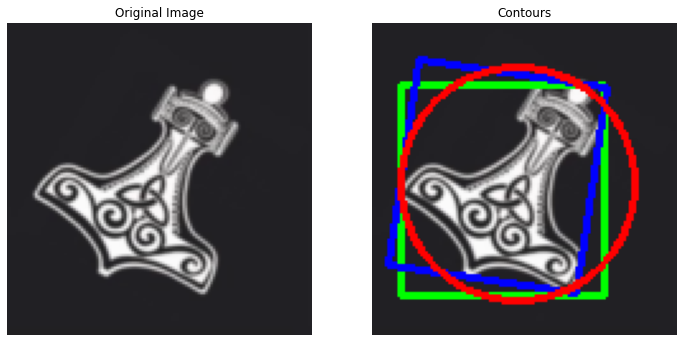

In [65]:
# Display the original image and the Contours side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

#Contours
plt.subplot(1, 2, 2)
plt.imshow(img) 
plt.title("Contours")
plt.axis('off')


plt.show()

## 9. Contours: Convex Hull and the Douglas-Peucker Algorithm

In [66]:
img = r.load_image('Picture1.jpg')
image = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [67]:
for cnt in contours:
    # Approximate polygon using Douglas-Peucker algorithm
    epsilon = 0.01 * cv2.arcLength(cnt, True)  # Epsilon is 1% of the contour's perimeter
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    # Calculate convex hull
    hull = cv2.convexHull(cnt)

    # Draw original contour
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 2)  # Blue

    # Draw approximated polygon
    cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)  # Green

    # Draw convex hull
    cv2.drawContours(img, [hull], -1, (0, 0, 255), 2)  # Red

#### Explanation of Results

- **Original Contour (Blue)**:
  - This is the exact contour detected from the thresholded image.
  - It contains arcs and irregularities.

- **Approximated Polygon (Green)**:
  - A simplified version of the contour.
  - The degree of simplification depends on the epsilon value.

- **Convex Hull (Red)**:
  - The smallest convex shape that completely encloses the object.
  - It smooths out concavities in the shape.

#### Summary
This visualization helps understand the differences:

- **Original Contour**: Most accurate but complex.
- **Approximated Polygon**: Simplified, ideal for further processing.
- **Convex Hull**: Smooth convex boundary, useful for convex shapes or wrapping objects.

You can adjust the epsilon value to control the level of approximation, where smaller values result in a closer match to the original contour.


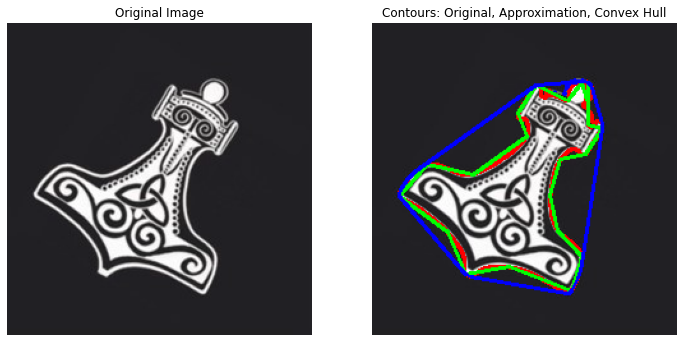

In [68]:
# Display the original image and the Contours side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

#Contours
plt.subplot(1, 2, 2)
plt.imshow(img) 
plt.title("Contours: Original, Approximation, Convex Hull")
plt.axis('off')


plt.show()

## 10. Line Detection in OpenCV Using the Hough Transform

Line detection in OpenCV utilizes the **Hough Transform** to identify straight lines in an image. There are two main methods for this:

- **cv2.HoughLines**: Uses the standard Hough Transform.
- **cv2.HoughLinesP**: Uses the probabilistic Hough Transform.

#### Key Differences Between Standard and Probabilistic Hough Transform

- **Standard Hough Transform (cv2.HoughLines)**:
  - Works by voting in a parameter space (rho and theta) to detect lines.
  - It analyzes all points, which can be computationally expensive.
  
- **Probabilistic Hough Transform (cv2.HoughLinesP)**:
  - Optimized by analyzing a subset of points and estimating lines based on probability.
  - Faster and more efficient.


In [69]:
# Load the image
img = r.load_image('linesDetected.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 30, 100)

- The `cv2.Canny()` function applies the Canny edge detection algorithm on the grayscale image (`gray`).
- It detects edges by using two threshold values (30 and 100) to identify strong and weak edges, respectively.

In [70]:
# Define parameters for HoughLinesP
min_line_length = 20  # Minimum length of a line
max_line_gap = 5     # Maximum allowed gap between line segments
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=min_line_length, maxLineGap=max_line_gap)

- **`min_line_length`**: Specifies the minimum length of a line to be detected. Lines shorter than this value will be ignored.
- **`max_line_gap`**: Defines the maximum allowed gap between line segments to be considered part of the same line.
- The `cv2.HoughLinesP()` function detects line segments in the edge-detected image (`edges`) using the specified parameters, including the distance resolution (1 pixel) and angle resolution (1 degree in radians).

#### Explanation of Parameters

- **edges**: A binary image with edges detected (from Canny).
- **rho**: Distance resolution in pixels (typically 1).
- **theta**: Angular resolution in radians (commonly `np.pi / 180`).
- **threshold**: Minimum number of votes required to detect a line.
- **minLineLength**: Minimum length of a line to be considered.
- **maxLineGap**: Maximum gap between two points to link them as a single line.


In [71]:
# Draw detected lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 4)  # Green lines

- The `for` loop iterates over the detected lines (`lines`) and extracts the coordinates of each line's endpoints (`x1, y1, x2, y2`).
- The `cv2.line()` function draws each detected line on the original image (`img`) using green color `(0, 255, 0)` and a thickness of 2 pixels.

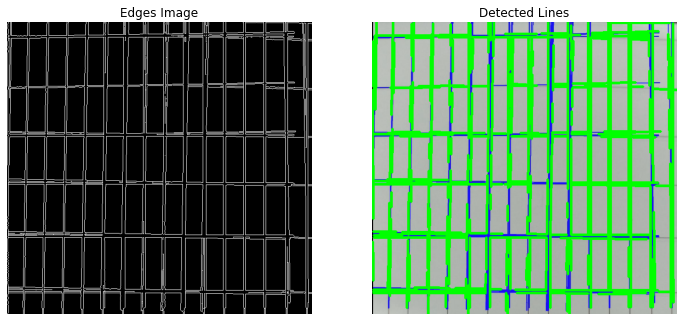

In [72]:
plt.figure(figsize=(12, 6))

# Edges Image
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Edges Image")
plt.axis('off')

#Contours
plt.subplot(1, 2, 2)
plt.imshow(img) 
plt.title("Detected Lines")
plt.axis('off')


plt.show()

## 11. Circle detection in OpenCV

Circle detection in OpenCV is commonly done using the **HoughCircles** function, which works similarly to the Hough Transform used for detecting lines, but is specifically designed for circles. This function detects circles by transforming the image into a parameter space where each potential circle is identified by its center coordinates and radius.

#### Key Parameters for `cv2.HoughCircles`:

- **image**: The input image (usually grayscale).
- **method**: Detection method. For HoughCircles, this is typically set to `cv2.HOUGH_GRADIENT`.
- **dp**: The inverse ratio of the accumulator resolution to the image resolution. Typically set to 1.
- **minDist**: Minimum distance between the centers of detected circles.
- **param1**: Higher threshold for the internal Canny edge detector.
- **param2**: Threshold for center detection. The lower this value, the more circles will be detected (including false positives).
- **minRadius**: Minimum radius of circles to detect.
- **maxRadius**: Maximum radius of circles to detect.


In [73]:
wellplate = r.load_image('circles.jpg')
image = wellplate.copy()

In [74]:
gray_img = cv2.cvtColor(wellplate, cv2.COLOR_BGR2GRAY)

In [75]:
# Apply Gaussian or median blur to reduce noise
blurred_img = cv2.medianBlur(gray_img, 5)

- **`cv2.medianBlur()`** applies a median blur to the grayscale image (`gray_img`) with a kernel size of 5 to reduce noise.

In [76]:
# Use HoughCircles to detect circles
circles = cv2.HoughCircles(
    blurred_img, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=100, 
    param2=30, 
    minRadius=0, 
    maxRadius=0
)

#### Explanation of Parameters for `cv2.HoughCircles`:

- **method**: 
  - Detection method for circle detection, typically `cv2.HOUGH_GRADIENT`.
  - **Effect**: The method determines the algorithm used for detection. The `HOUGH_GRADIENT` method is the most commonly used one, but changing this could lead to different results depending on the image.

- **dp** (Inverse ratio of accumulator resolution to image resolution): 
  - **Effect**: A value of 1 means the accumulator has the same resolution as the image, and larger values reduce the resolution of the accumulator. A larger `dp` can speed up detection but may miss smaller circles. Lower `dp` results in better resolution and precision at the cost of computational time.

- **minDist** (Minimum distance between circle centers): 
  - **Effect**: Determines how far apart the centers of detected circles must be. A small value may detect multiple overlapping circles, while a larger value reduces the chance of detecting multiple circles in the same region.

- **param1** (Higher threshold for the internal Canny edge detector):
  - **Effect**: This parameter affects edge detection. Increasing `param1` results in fewer edges being detected (tighter edges), leading to fewer detected circles. Lowering it detects more edges but may include false positives.

- **param2** (Threshold for center detection): 
  - **Effect**: Controls the sensitivity of the circle detection. Lowering `param2` detects more potential circle centers, but increases the likelihood of false positives. A higher `param2` reduces false positives but may miss some circles.

- **minRadius** (Minimum radius of circles to detect): 
  - **Effect**: Limits the size of circles detected. A small `minRadius` value allows detection of smaller circles, while a larger value filters out small circles and focuses on larger ones.

- **maxRadius** (Maximum radius of circles to detect):
  - **Effect**: Sets an upper limit on the size of circles detected. A smaller value helps focus detection on smaller circles, while a larger value includes larger circles.


In [77]:
# Convert the circle coordinates and radius to integers
circles = np.uint16(np.around(circles))

- **`np.uint16(np.around(circles))`** converts the circle coordinates and radius to integers by rounding the values and casting them to unsigned 16-bit integers.

In [78]:
# Draw the detected circles on the original image
for i in circles[0, :]:
    # Draw the outer circle
    cv2.circle(wellplate, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Draw the center of the circle
    cv2.circle(wellplate, (i[0], i[1]), 2, (0, 0, 255), 3)

- The `for` loop iterates over the detected circles (`circles[0, :]`), where each circle is represented by its center `(i[0], i[1])` and radius `i[2]`.
- **`cv2.circle()`** is used twice: 
  - First to draw the outer circle with a green color `(0, 255, 0)` and a thickness of 2.
  - Second to draw the center of the circle with a red color `(0, 0, 255)` and a thickness of 3.

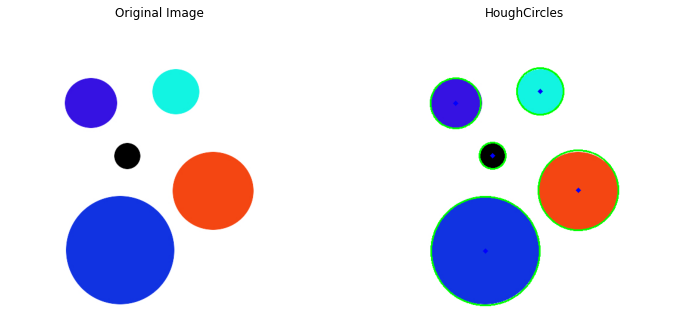

In [79]:
# Display the original image and the circle side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

#HoughCircles
plt.subplot(1, 2, 2)
plt.imshow(wellplate) 
plt.title("HoughCircles")
plt.axis('off')


plt.show()